In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import csv
from statistics import mean 

In [135]:
# we need delta of bandwidth (for i in range(50, 500, 50)) this would be the x-axis
# profile and label should be zipped!
def calc_sensitivity(deltaBandwidth, *profiles):
    sensitivity = [[] for i in range(len(profiles))]
    iterator = 0
    for bandwidth_f1 in profiles:
        for bandwidthDiff in deltaBandwidth:
            num_row = bandwidth_f1.shape[0]
            sensitivityTemp = []
            for i in range(0, num_row):
                j = i + 1
                currBandwidth = bandwidth_f1.iloc[i].bandwidth
                try:
                    while(bandwidth_f1.iloc[j].bandwidth - currBandwidth <= bandwidthDiff):
                        j += 1
                except IndexError:
                    pass
                if i < j:
                    sensitivityTemp.append((bandwidth_f1.iloc[j-1].F1 - bandwidth_f1.iloc[i].F1)/bandwidthDiff)
#                 sensitivityTemp.append((bandwidth_f1[0].iloc[j-1].F1 - bandwidth_f1[0].iloc[i].F1)/(int(bandwidth_f1[0].iloc[j-1].bandwidth) - currBandwidth))
            sensitivity[iterator].append(mean(sensitivityTemp))
        iterator += 1
    return sensitivity
    
#     #                 while (bandwidth_f1.iloc[j].F1 - bandwidth_f1.iloc[i-1].F1 <= -fluctuation_threshold):
#     #                     try:
#     #                         bandwidth_f1_remove_fluc = bandwidth_f1_remove_fluc.drop(bandwidth_f1.iloc[j].name)
#     #                     except:
#     #                         pass
#     #                     j += 1
#     #                     if (j >= num_row):
#     #                         break

#         # set figure size
# #         def plot_signal(x,y, ..., **kwargs):
# #     # Skipping a lot of other complexity here
# #     f, ax = plt.subplots(figsize=fig_size)
# #     ax.plot(x,y, ...)
# #     # further stuff
# #     return ax

# # ax = plot_signal(x,y, ...)
# # ax.plot(x2, y2, ...)
# # plt.show()
#     f, ax = plt.subplots(figsize=(12,6), dpi=80)
# #     plt.figure(figsize=(12,6), dpi=80)

#     ax.set_xlabel('Bandwidth Delta (Kbps)')
#     ax.set_ylabel('Sensitivity (f1-score increment/kbps)')
    
#     iterator = 0
#     for label in profiles:
#         ax = ax.plot(deltaBandwidth, sensitivity[iterator],
#         'o-',
#         label = label[1])
#         iterator += 1
# #     plt1 = plt.plot(deltaBandwidth, sensitivity, 'o-')
# #     plt2 = plt.plot(bandwidth_f1_2['bandwidth'], bandwidth_f1_2['F1'],
# #     'o-',
# #     label = label2,)

#     # y-axis percentage
# #     plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#     ax.ticklabel_format(style='plain', axis='x', )

#     ax.legend()
#     ax.ion()
#     return ax

In [190]:
# profileNum only accepts 1 or even number of profile at this moment(?)
def plot_sensitivity(*profileNum):
    # creating the figure template
    numOfProfiles = len(profileNum)
    row = 0
    col = 0
    if(numOfProfiles == 1):
        row = 1
        col = 1
    else:
        row = numOfProfiles//2
        col = 2
    f, ax = plt.subplots(row, col, figsize=(16,4*row), dpi=80)
    
    # calculate all of the sensitivities
    deltaBandwidth = [i for i in range(10, 710, 30)]
    sensitivities = []
    labels = []
    sequence = ["highway", "jakarta", "roppongi", "coldwater"]
#     sequence = ["jakarta", "roppongi", "coldwater"]
    for num in profileNum:
        profile_highway_adaptive = pd.read_csv("./profile-highway/profile-separated/profile-%d.csv" % (num))
        profile_jakarta_adaptive = pd.read_csv("./profile-jakarta/profile-separated/profile-%d.csv" % (num))
        profile_roppongi_adaptive = pd.read_csv("./profile-roppongi/profile-separated/profile-%d.csv" % (num))
        profile_coldwater_adaptive = pd.read_csv("./profile-coldwater/profile-separated/profile-%d.csv" % (num))
        labels.append(str(num))
        sensitivities.append(calc_sensitivity(deltaBandwidth, profile_highway_adaptive, profile_jakarta_adaptive, profile_roppongi_adaptive, profile_coldwater_adaptive))

    iterator = 0
    means = [0 for i in range(4)]
    for sensitivity in sensitivities:
        posX = iterator%2
        posY = iterator//2
        ax[posY, posX].set_xlabel('Bandwidth Delta (Kbps)')
        ax[posY, posX].set_ylabel('Sensitivity (f1-score increment/kbps)')
        for i in range(4):
            ax[posY, posX].plot(deltaBandwidth, sensitivity[i], 'o-', label=sequence[i]+"-"+labels[iterator])
            means[i] += mean(sensitivity[i])/numOfProfiles
        iterator += 1
        ax[posY, posX].legend()
    for m in means:
        print(m)

    plt.show()
            

In [194]:
def calc_average_sensitivity(profileNum):
    deltaBandwidth = [i for i in range(10, 710, 30)]
    numOfProfiles = 20
    sensitivities = []
    sequence = ["highway", "jakarta", "roppongi", "coldwater"]
    for num in profileNum:
        profile_highway_adaptive = pd.read_csv("./profile-highway/profile-separated/profile-%d.csv" % (num))
        profile_jakarta_adaptive = pd.read_csv("./profile-jakarta/profile-separated/profile-%d.csv" % (num))
        profile_roppongi_adaptive = pd.read_csv("./profile-roppongi/profile-separated/profile-%d.csv" % (num))
        profile_coldwater_adaptive = pd.read_csv("./profile-coldwater/profile-separated/profile-%d.csv" % (num))
        sensitivities.append(calc_sensitivity(deltaBandwidth, profile_highway_adaptive, profile_jakarta_adaptive, profile_roppongi_adaptive, profile_coldwater_adaptive))

    iterator = 0
    means = [0 for i in range(4)]
    for sensitivity in sensitivities:
        for i in range(4):
            means[i] += mean(sensitivity[i])/numOfProfiles
        iterator += 1
    for m in means:
        print(m)


0.0014756645089720585
0.0003771648404130724
0.0005157381826518415
0.0003097793934514999


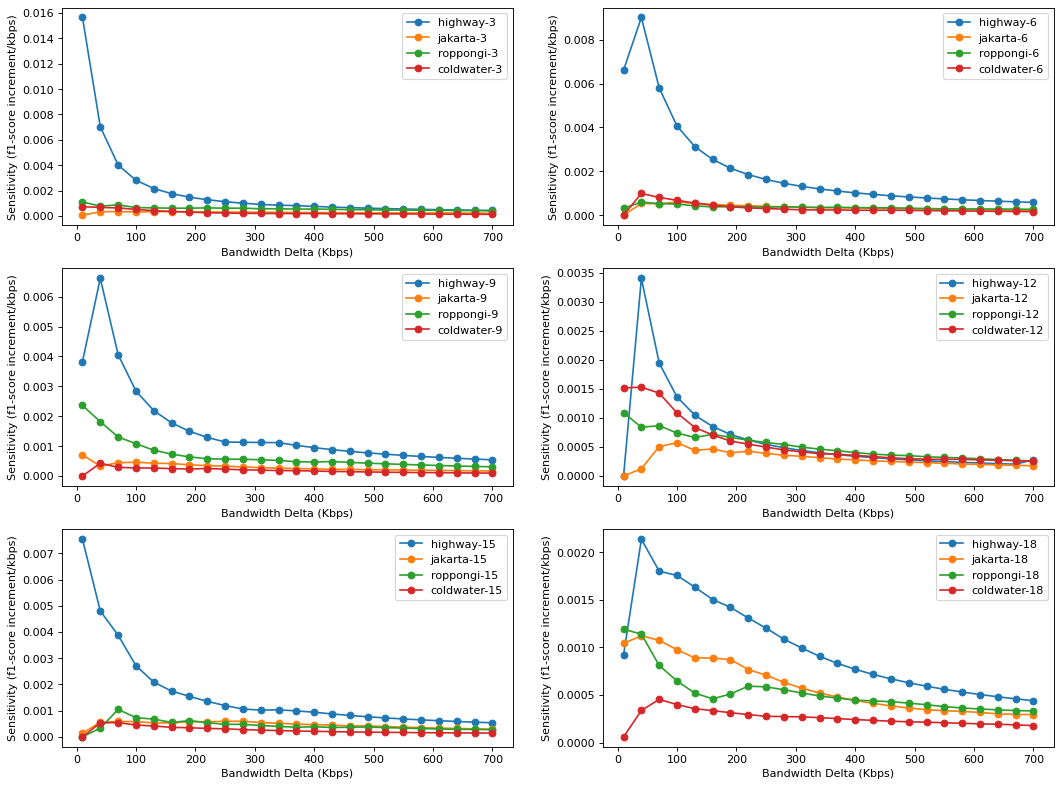

In [195]:
plot_sensitivity(3, 6, 9, 12, 15, 18)
# plot_sensitivity(4, 9, 14, 19)
# calc_average_sensitivity([i for i in range(20)])

In [196]:
calc_average_sensitivity([i for i in range(20)])

0.0014074068690058492
0.00042103561603693695
0.0005236484887053832
0.0003470800092177698


0.0011646119245581619
0.0003733862352820617
0.0005992197192535535
0.00030995775816223495


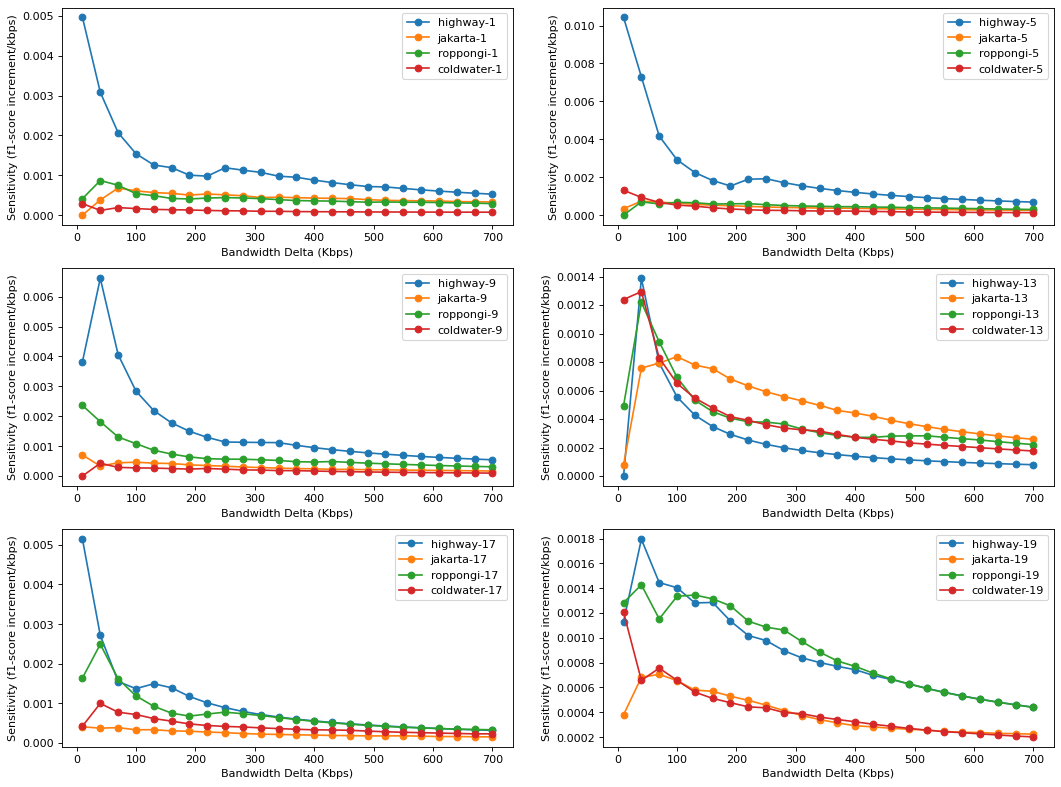

In [193]:
plot_sensitivity(1, 5, 9, 13, 17, 19)

In [123]:
profile_highway_adaptive = pd.read_csv("./profile-highway/profile-separated/profile-10.csv")
profile_jakarta_adaptive = pd.read_csv("./profile-jakarta/profile-separated/profile-10.csv")
profile_roppongi_adaptive = pd.read_csv("./profile-roppongi/profile-separated/profile-10.csv")
profile_coldwater_adaptive = pd.read_csv("./profile-coldwater/profile-separated/profile-10.csv")

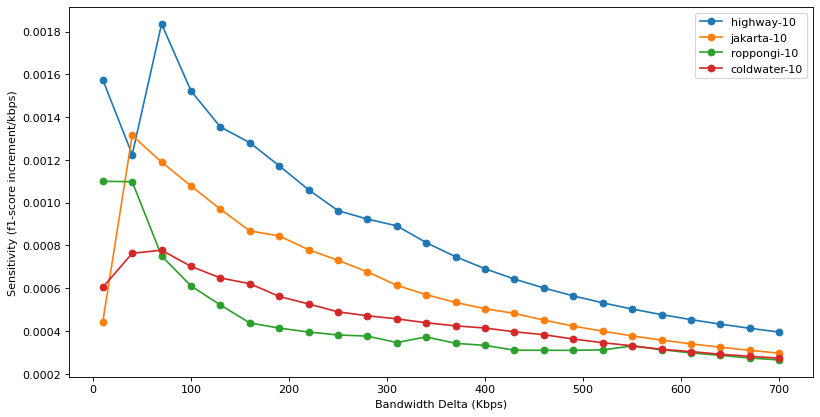

In [124]:
test = plot_sensitivity((profile_rene_adaptive, "highway-10"), (profile_jakarta_adaptive, "jakarta-10"), (profile_roppongi_adaptive, "roppongi-10"), (profile_coldwater_adaptive, "coldwater-10"))

In [ ]:
test.show()

In [125]:
profile_highway_adaptive = pd.read_csv("./profile-highway/profile-separated/profile-11.csv")
profile_jakarta_adaptive = pd.read_csv("./profile-jakarta/profile-separated/profile-11.csv")
profile_roppongi_adaptive = pd.read_csv("./profile-roppongi/profile-separated/profile-11.csv")
profile_coldwater_adaptive = pd.read_csv("./profile-coldwater/profile-separated/profile-11.csv")

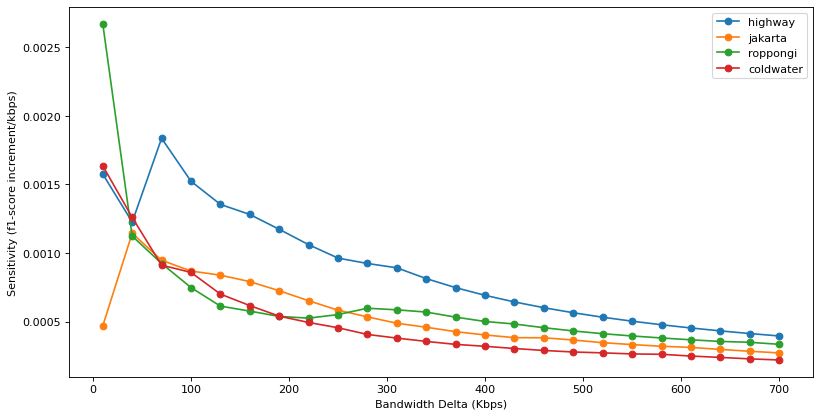

In [126]:
plot_sensitivity((profile_rene_adaptive, "highway"), (profile_jakarta_adaptive, "jakarta"), (profile_roppongi_adaptive, "roppongi"), (profile_coldwater_adaptive, "coldwater"))